In [1]:
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.DataFrame([
        ('Q1','Blue',100),
        ('Q1','Green',300),
        ('Q2','Blue',200),
        ('Q2','Green',350),
        ('Q3','Blue',300),
        ('Q3','Green',400),
        ('Q4','Blue',400),
        ('Q4','Green',450),
    ], 
    columns=['quarter', 'company', 'value']
)
data = data.set_index(['quarter', 'company'])
data

value
quarter company       
Q1      Blue       100
        Green      300
Q2      Blue       200
        Green      350
Q3      Blue       300
        Green      400
Q4      Blue       400
        Green      450

In [6]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.value

quarter  company
Q1       Blue       100
         Green      300
Q2       Blue       200
         Green      350
Q3       Blue       300
         Green      400
Q4       Blue       400
         Green      450
Name: value, dtype: int64

In [94]:
dfs = []
names = ['a', 'b', 'c', 'd']

for n in names:
    # initialize data of lists. 
    data = {'algorithm': ['Tom', 'nick', 'Tom', 'nick'], 
            'mutation': [random.randint(0, 9), random.randint(0, 9), random.randint(0, 9), random.randint(0, 9)]} 
    # Create DataFrame 
    df = pd.DataFrame(data) 
    # Print the output. 
    print(df)
    dfs.append(df)

print(len(dfs))

  algorithm  mutation
0       Tom         2
1      nick         3
2       Tom         6
3      nick         1
  algorithm  mutation
0       Tom         7
1      nick         1
2       Tom         9
3      nick         7
  algorithm  mutation
0       Tom         5
1      nick         1
2       Tom         6
3      nick         6
  algorithm  mutation
0       Tom         0
1      nick         3
2       Tom         9
3      nick         2
4


In [95]:
df_dict = {}
attributes = ['mutation', 'algorithm']

for name, df in zip(names, dfs):
    for attribute in attributes:
        if attribute in df_dict:
            # concat
            df_dict[attribute] = pd.concat([df_dict[attribute], df[attribute]], ignore_index=True)
        else:
            df_dict[attribute] = df[attribute]
    # add the benchmark names
    if 'benchmark_name' in df_dict:
        # concat
        tmp_col = pd.Series([name] * len(df))
        df_dict['benchmark_name'] = pd.concat([df_dict['benchmark_name'], tmp_col], ignore_index=True)
    else:
        df_dict['benchmark_name'] = pd.Series([name] * len(df))
df = pd.DataFrame(df_dict)
df

,mutation,algorithm,benchmark_name
0,2,Tom,a
1,3,nick,a
2,6,Tom,a
3,1,nick,a
4,7,Tom,b
5,1,nick,b
6,9,Tom,b
7,7,nick,b
8,5,Tom,c
9,1,nick,c


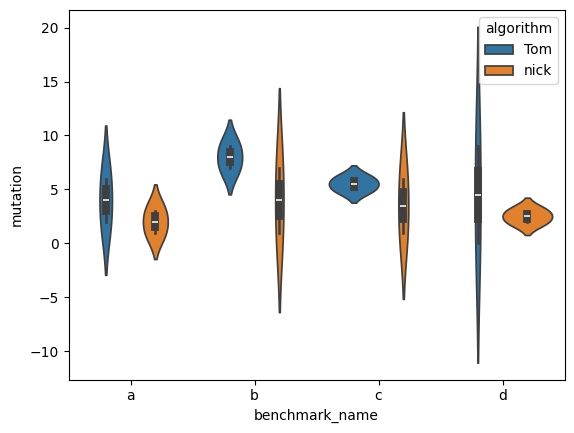

In [96]:
sns.violinplot(data=df, x='benchmark_name', y='mutation', hue='algorithm')
plt.show()